In [23]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
#import matplotlib.pyplot as plt

p = pd.read_csv('DelayedFlights.csv')

p = p[['UniqueCarrier', 'Origin', 'Dest',
        'Month', 'DayofMonth', 'DayOfWeek', 'CRSDepTime', 'DepTime', 'DepDelay',
        'CRSArrTime', 'ArrTime', 'ArrDelay']]

#99% de filling, es decideix esborrar les files amb dades buides
p2 = p.dropna(axis=0)

# treure valors unics de la columna ArrDelay perque dòna error al fer el split
p3 = p2.groupby('ArrDelay').filter(lambda x : len(x)>1)

#passar valors de string a nombre en columnes Origin and Dest
p3['Origin'].replace(list(set(p3['Origin'])), list(range(len(set(p3['Origin'])))), inplace = True)
p3['Dest'].replace(list(set(p3['Dest'])), list(range(len(set(p3['Dest'])))), inplace = True)

# passar a int16 els valors per intentar reduir problemes de memòria als models
p3[['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime'
   ]] = p3[['Month', 'DayofMonth', 'DayOfWeek', 'Origin', 'Dest', 'DepTime', 'CRSDepTime', 'ArrTime', 
    'CRSArrTime']].astype('int16')

# Passar temps de format militar a minuts
def format_hora(par):
    if par == 2400: par = 0
    par = "{0:04d}".format(int(par))
    hora = datetime.time(hour = int(par[0:2]), minute = int(par[2:4]))
    total = int(hora.strftime('%M'))
    total += int(hora.strftime('%H')) * 60
    return total 

p3['DepTime'] = p3['DepTime'].apply(format_hora)
p3['ArrTime'] = p3['ArrTime'].apply(format_hora)
p3['CRSArrTime'] = p3['CRSArrTime'].apply(format_hora)
p3['CRSDepTime'] = p3['CRSDepTime'].apply(format_hora)

# passar a float16 els valors per intentar reduir problemes de memòria als models
p3[['DepDelay', 'ArrDelay']] = p3[['DepDelay', 'ArrDelay']].astype('float16')

# dummies
p4 = pd.concat([p3, pd.get_dummies(p3['UniqueCarrier'])], axis = 1)
p4 = p4.drop(labels = ['UniqueCarrier'], axis=1)

p4.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Origin,1928155.0,143.349625,102.212452,0.0,48.0,127.0,247.0,302.0
Dest,1928155.0,146.649500,100.214524,0.0,55.0,131.0,245.0,301.0
Month,1928155.0,6.107890,3.480738,1.0,3.0,6.0,9.0,12.0
DayofMonth,1928155.0,15.752010,8.776528,1.0,8.0,16.0,23.0,31.0
DayOfWeek,1928155.0,3.984976,1.996055,1.0,2.0,4.0,6.0,7.0
CRSDepTime,1928155.0,891.676071,255.211566,0.0,695.0,910.0,1095.0,1439.0
DepTime,1928155.0,922.658765,270.450030,0.0,723.0,945.0,1140.0,1439.0
DepDelay,1928155.0,NaN,NaN,6.0,12.0,24.0,53.0,1403.0
CRSArrTime,1928155.0,992.100224,279.016777,0.0,805.0,1025.0,1214.0,1439.0
ArrTime,1928155.0,976.844007,329.960749,0.0,795.0,1035.0,1230.0,1439.0


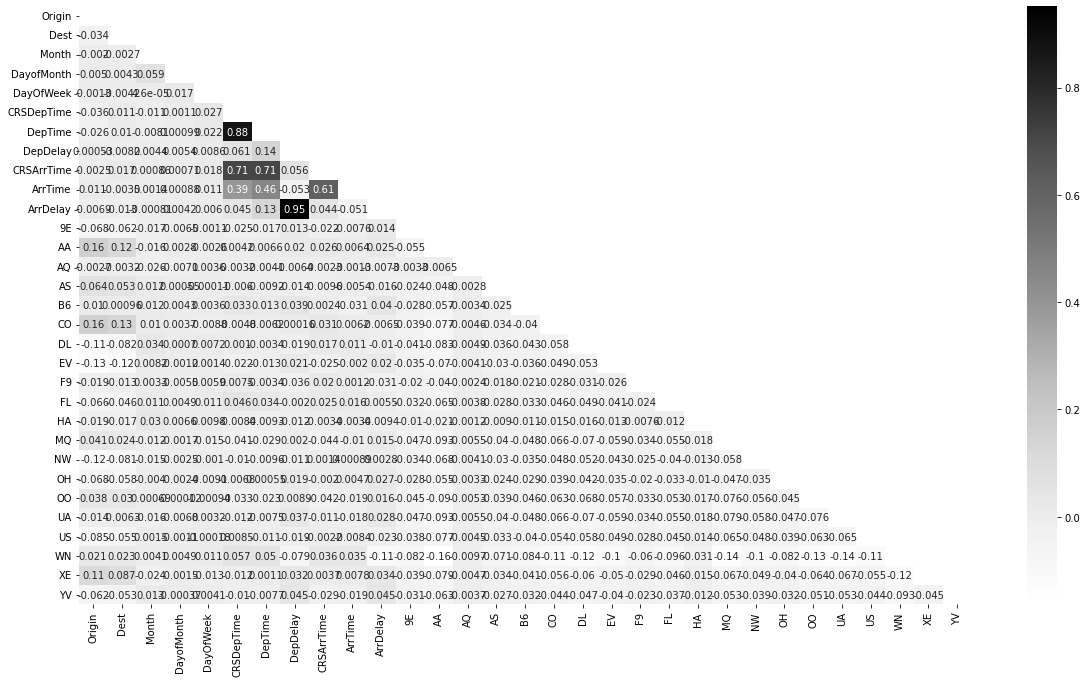

DepTime     0.130372
DepDelay    0.951280
ArrDelay    1.000000
WN          0.105956
Name: ArrDelay, dtype: float64

In [2]:
plt.figure(figsize=(20,11))
cor = p4.corr()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor, mask=mask, annot=True, cmap=plt.cm.Greys)
plt.show()


cor_target = abs(cor["ArrDelay"])
relevant_features = cor_target[cor_target>0.06]
relevant_features

In [24]:
X = p4.drop(['ArrDelay'], axis=1)
y = p4.pop('ArrDelay')

In [25]:
# 4 models de regressió

from sklearn.linear_model import SGDRegressor, HuberRegressor, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

estimadors = [
        ("SGDR", SGDRegressor()),
        ("RandomForest", RandomForestRegressor(random_state = 42)),
        ("Huber", HuberRegressor()),
        ("ElasticNet", ElasticNet())]

for i, (nom, clf) in enumerate(estimadors):
    clf.fit(X, y)
    print("R quadrat per", nom, ":", clf.score(X, y))
    ypred = clf.predict(X)
    print("MSE per", nom, ":", mean_squared_error(y, ypred))
    print()

C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per SGDR : 1.0
MSE per SGDR : 7.253018481250447e+27



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per RandomForest : 1.0
MSE per RandomForest : 2.604541791401624



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per Huber : 1.0
MSE per Huber : 302.0460831471942



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per ElasticNet : 1.0
MSE per ElasticNet : 294.4499099876552



In [10]:
# Regresió Logística no es pot fer perquè necessita més memòria, vaig reduir el nombre d'atributs i el tipus dades de 64 a 16 però no ha estat suficient
# TheilSenRegressor no es pot fer perquè necessita més memòria
# KNeighborsRegressor no l'he fet perquè es tira més de 10 hores calculant i no acaba

In [26]:
# amb paràmetres (max_iter=1500, penalty='l1', l1_ratio= 0.4, alpha=0.0006, epsilon=0.01)

estimadors = [
        ("SGDR", SGDRegressor(max_iter=1500, penalty='l1', l1_ratio= 0.4, alpha=0.0006, epsilon=0.01)),
        ("RandomForest", RandomForestRegressor(max_features= 5, random_state = 42)),
        ("Huber", HuberRegressor(max_iter = 700, epsilon=1.05, alpha=0.001)),
        ("ElasticNet", ElasticNet(alpha=0.7, l1_ratio=0, max_iter=2000))]

for i, (nom, clf) in enumerate(estimadors):
    clf.fit(X, y)
    print("R quadrat per", nom, ":", clf.score(X, y))
    ypred = clf.predict(X)
    print("MSE per", nom, ":", mean_squared_error(y, ypred))
    print()

C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per SGDR : 1.0
MSE per SGDR : 4.608497197421679e+27



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per RandomForest : 1.0
MSE per RandomForest : 17.1614247279394



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per Huber : 1.0
MSE per Huber : 298.12957459939696



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.842e+08, tolerance: 6.003e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per ElasticNet : 1.0
MSE per ElasticNet : 293.52881419908715



In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 27, train_size = 0.7, stratify = y)

In [28]:
# models amb les millors puntuacions i l'split
estimadors = [
        ("SGDR", SGDRegressor(max_iter=1500, penalty='l1', l1_ratio= 0.4, alpha=0.0006, epsilon=0.01)),
        ("RandomForest", RandomForestRegressor(random_state = 42)),
        ("Huber", HuberRegressor(max_iter = 700, epsilon=1.05, alpha=0.001)),
        ("ElasticNet", ElasticNet(alpha=0.7, l1_ratio=0, max_iter=2000))]

for i, (nom, clf) in enumerate(estimadors):
    clf.fit(X_train, y_train)
    print("R quadrat per", nom, "amb split:", clf.score(X_train, y_train))
    ypred = clf.predict(X_test)
    print("MSE per", nom, " amb split:", mean_squared_error(y_test, ypred))
    print()

C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per SGDR amb split: 1.0
MSE per SGDR  amb split: 1.1912412646214311e+28



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per RandomForest amb split: 1.0
MSE per RandomForest  amb split: 23.842573616251784



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


R quadrat per Huber amb split: 1.0
MSE per Huber  amb split: 296.9025482593106



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.990e+08, tolerance: 4.178e+05 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


R quadrat per ElasticNet amb split: 1.0
MSE per ElasticNet  amb split: 293.2733649931025



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:929: RuntimeWarning: overflow encountered in square
  weight * (y_true - np.average(y_true, axis=0, weights=sample_weight)) ** 2


In [17]:
# primer procesament d'enginyeria fent logaritme a DepDelay i ArrDelay (amb valors negatius)

p4 = pd.concat([p3, pd.get_dummies(p3['UniqueCarrier'])], axis = 1)
p4 = p4.drop(labels = ['UniqueCarrier'], axis=1)

p4['ArrDelaylog'] = (p4['ArrDelay']-p4['ArrDelay'].min()+1).transform(np.log)
p4['DepDelaylog'] = (p4['DepDelay']-p4['DepDelay'].min()+1).transform(np.log)

X_ = p4.drop(['DepDelay', 'ArrDelay', 'ArrDelaylog'], axis=1)
y_ = p4.pop('ArrDelaylog')

ZZ_train, ZZ_test, yy_train, yy_test = train_test_split(X_, y_, random_state = 27, train_size = 0.7, stratify = y_)

In [19]:
# segon procesament d'enginyeria fent RobustScaler només a alguns atributs

from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import RobustScaler

mapper = DataFrameMapper([
(['DepTime', 'ArrTime', 'CRSDepTime', 'CRSArrTime'], RobustScaler()),
(['DepDelaylog', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', '9E', 'AA',
'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NW', 'OH',
'OO', 'UA', 'US', 'WN', 'XE', 'YV'], None)])

p5 = pd.DataFrame(mapper.fit_transform(ZZ_train), columns = ['DepTime', 'ArrTime', 'CRSDepTime',
 'CRSArrTime', 'DepDelaylog', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', '9E', 'AA',
'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NW', 'OH',
'OO', 'UA', 'US', 'WN', 'XE', 'YV'])

p5.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DepTime,1349708.0,-0.054096,0.648721,-2.266187,-0.532374,0.000000,0.467626,1.184652
ArrTime,1349708.0,-0.131552,0.758283,-2.377011,-0.549425,0.000000,0.450575,0.931034
CRSDepTime,1349708.0,-0.046103,0.638063,-2.272500,-0.537500,0.000000,0.462500,1.322500
CRSArrTime,1349708.0,-0.081209,0.682543,-2.506112,-0.537897,0.000000,0.462103,1.012225
DepDelaylog,1349708.0,2.870409,1.339289,0.000000,1.946289,2.945312,3.871094,7.242188
Origin,1349708.0,143.333092,102.190819,0.000000,48.000000,127.000000,247.000000,302.000000
Dest,1349708.0,146.649882,100.215135,0.000000,55.000000,131.000000,245.000000,301.000000
Month,1349708.0,6.106879,3.481490,1.000000,3.000000,6.000000,9.000000,12.000000
DayofMonth,1349708.0,15.754046,8.777487,1.000000,8.000000,16.000000,23.000000,31.000000
DayOfWeek,1349708.0,3.984986,1.995912,1.000000,2.000000,4.000000,6.000000,7.000000


In [20]:
# models després de l'enginyeria

p5test = pd.DataFrame(mapper.transform(ZZ_test), columns = ['DepTime', 'ArrTime', 'CRSDepTime',
 'CRSArrTime', 'DepDelaylog', 'Origin', 'Dest', 'Month', 'DayofMonth', 'DayOfWeek', '9E', 'AA',
'AQ', 'AS', 'B6', 'CO', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'NW', 'OH',
'OO', 'UA', 'US', 'WN', 'XE', 'YV'])


estimadors = [
        ("SGDR", SGDRegressor(
        max_iter=1500, penalty='l1', l1_ratio= 0.4, alpha=0.0006, epsilon=0.01
        )),
        ("RandomForest", RandomForestRegressor(random_state = 42)
        ),
        ("Huber", HuberRegressor(max_iter = 700, epsilon=1.05, alpha=0.001)
        ),
        ("ElasticNet", ElasticNet(alpha=0.7, l1_ratio=0, max_iter=2000)
        )]

for i, (nom, clf) in enumerate(estimadors):
    clf.fit(p5, yy_train)
    print("R quadrat del train per", nom, "amb split-enginyeria:", clf.score(p5, yy_train))
      
    yypred = clf.predict(p5test)

    print("MSE per", nom, "amb split-enginyeria:", mean_squared_error(yy_test, yypred))

    print()

R quadrat del train per SGDR amb split-enginyeria: -2.2221227818138217e+25
MSE per SGDR amb split-enginyeria:  3.370452784184071e+24

R quadrat del train per RandomForest amb split-enginyeria: 0.9985619651050257
MSE per RandomForest amb split-enginyeria:  0.001537172158851859



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


R quadrat del train per Huber amb split-enginyeria: 0.6668757315487099
MSE per Huber amb split-enginyeria:  0.05055076772192384

R quadrat del train per ElasticNet amb split-enginyeria: 0.6201196447637549
MSE per ElasticNet amb split-enginyeria:  0.057650737334844764



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.273e+04, tolerance: 2.046e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [22]:
#Sense DepDelay com atribut

p5 = p5.drop(['DepDelaylog'], axis=1)
p5test = p5test.drop(['DepDelaylog'], axis=1)

estimadors = [
        ("SGDR", SGDRegressor(
        max_iter=1500, penalty='l1', l1_ratio= 0.4, alpha=0.0006, epsilon=0.01
        )),
        ("RandomForest", RandomForestRegressor(random_state = 42)
        ),
        ("Huber", HuberRegressor(max_iter = 700, epsilon=1.05, alpha=0.001)
        ),
        ("ElasticNet", ElasticNet(alpha=0.7, l1_ratio=0, max_iter=2000)
        )]

for i, (nom, clf) in enumerate(estimadors):
    clf.fit(p5, yy_train)
    print("R quadrat del train per", nom, "amb split-enginyeria-sense DepDelay:", clf.score(p5, yy_train))
      
    yypred = clf.predict(p5test)

    print("MSE per", nom, "amb split-enginyeria-sense DepDelay:", mean_squared_error(yy_test, yypred))

    print()

C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


R quadrat del train per SGDR amb split-enginyeria-sense DepDelay: -1.2930213314915135e+24
MSE per SGDR amb split-enginyeria-sense DepDelay: 1.9615529133217197e+23

R quadrat del train per RandomForest amb split-enginyeria-sense DepDelay: 0.9998717401806335
MSE per RandomForest amb split-enginyeria-sense DepDelay: 0.0001763684932434525



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


R quadrat del train per Huber amb split-enginyeria-sense DepDelay: -0.5959602251270577
MSE per Huber amb split-enginyeria-sense DepDelay: 0.23780483614455727



C:\Users\Ripley\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+05, tolerance: 2.046e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


R quadrat del train per ElasticNet amb split-enginyeria-sense DepDelay: 0.024910690791106305
MSE per ElasticNet amb split-enginyeria-sense DepDelay: 0.1477801793803586



In [21]:
# el millor model ha estat el RainForest en totes les proves i el pitjor el SGDR